In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('titanic_day1.csv')
df

,ID_passenger,Survived,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Age_Category,Survived_num,Fare_Category
0,1,Yes,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Young Adult (18-30],1,Luxury Fare (41.5-513]
1,2,Yes,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Infant(0-1],1,Luxury Fare (41.5-513]
2,3,No,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,Toddler (1-5],0,Luxury Fare (41.5-513]
3,4,No,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,Young Adult (18-30],0,Luxury Fare (41.5-513]
4,5,No,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,Young Adult (18-30],0,Luxury Fare (41.5-513]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,No,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,Teen(12-18],0,Standard Fare (10.5-22]
1305,1306,No,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,Missing,0,Standard Fare (10.5-22]
1306,1307,No,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,Young Adult (18-30],0,Lowest Fare (0-8]
1307,1308,No,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,Young Adult (18-30],0,Lowest Fare (0-8]


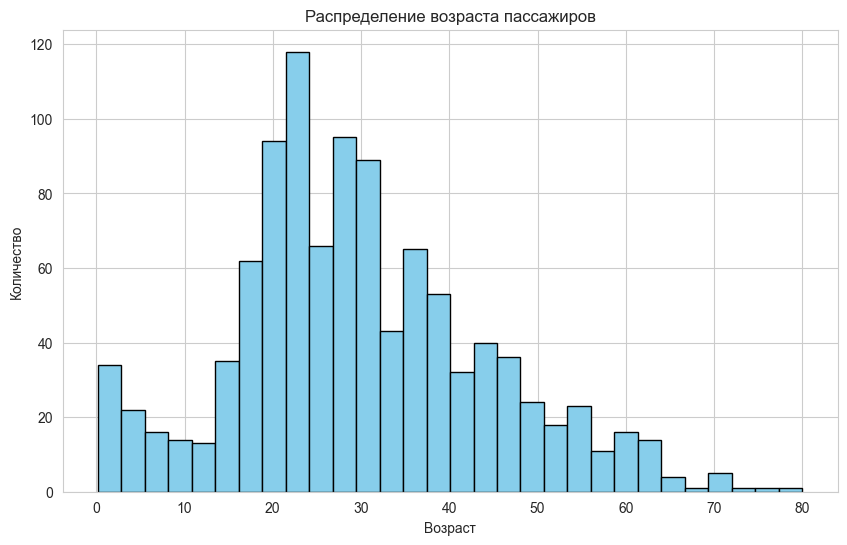

In [32]:
sns.set_style("whitegrid")  # Сетка на фоне
plt.figure(figsize=(10, 6))  # Размер графиков по умолчанию
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.savefig('age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Сколько пассажиров было в каждом возрастном диапазоне.

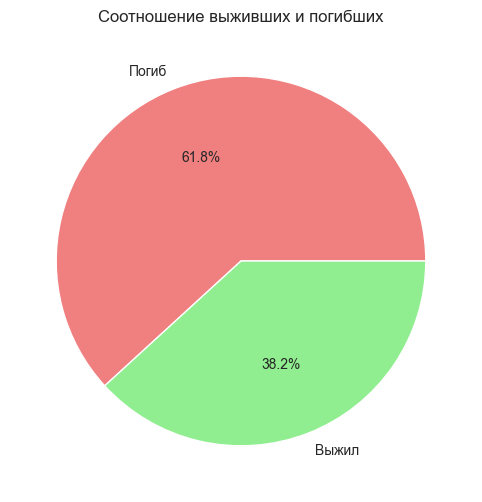

In [7]:
sns.set_style("whitegrid")  # Сетка на фоне
plt.figure(figsize=(10, 6))  # Размер графиков по умолчанию
df['Survived'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['Погиб', 'Выжил'],
    colors=['lightcoral', 'lightgreen']
)
plt.title("Соотношение выживших и погибших")
plt.ylabel("")
plt.show()

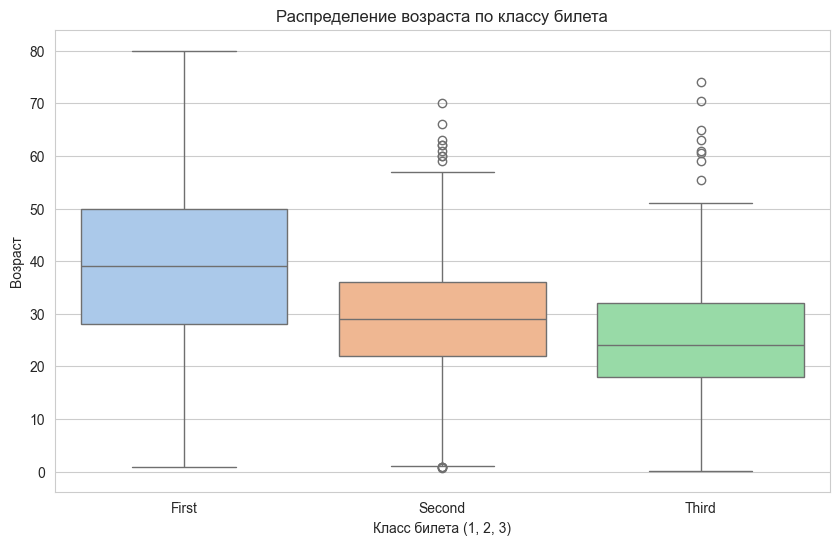

In [34]:
sns.set_style("whitegrid")  # Сетка на фоне
plt.figure(figsize=(10, 6))  # Размер графиков по умолчанию
sns.boxplot(
    x='Passenger Class', 
    y='Age', 
    data=df, 
    hue='Passenger Class',  # та же переменная, что и x
    palette='pastel',
    legend=False)
plt.title("Распределение возраста по классу билета")
plt.xlabel("Класс билета (1, 2, 3)")
plt.ylabel("Возраст")
plt.savefig('age_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

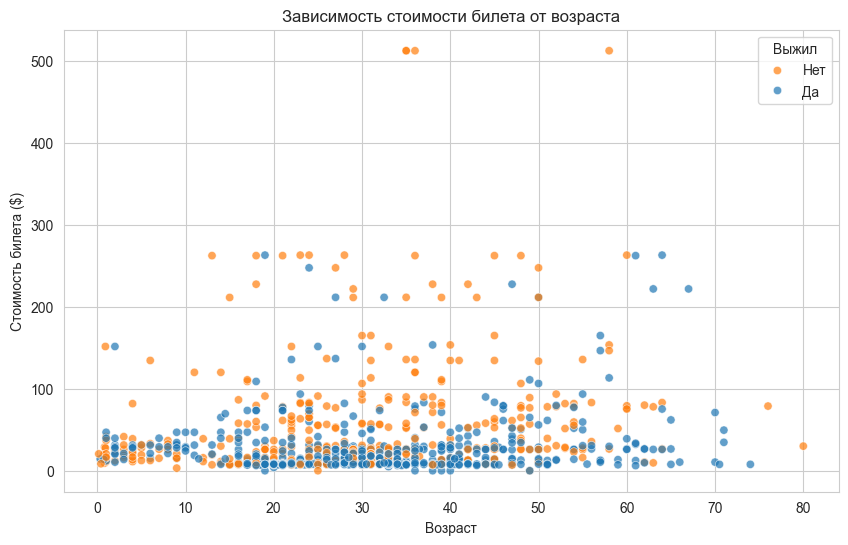

In [13]:
sns.set_style("whitegrid")  # Сетка на фоне
plt.figure(figsize=(10, 6))  # Размер графиков по умолчанию
sns.scatterplot(x='Age', y='Passenger Fare', hue='Survived_num', data=df, alpha=0.7)
plt.title("Зависимость стоимости билета от возраста")
plt.xlabel("Возраст")
plt.ylabel("Стоимость билета ($)")
plt.legend(title="Выжил", labels=["Нет", "Да"])
plt.show()

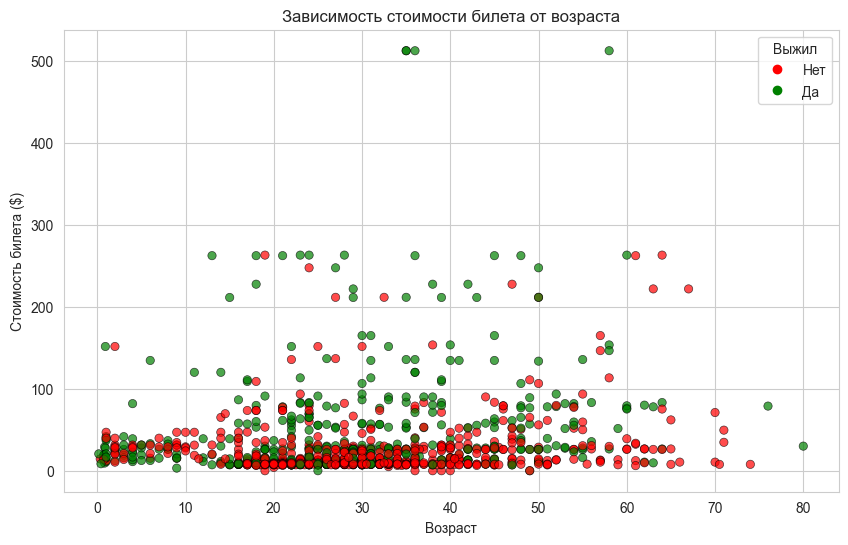

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Создаем график с жестко заданными параметрами
scatter = sns.scatterplot(
    x='Age',
    y='Passenger Fare',
    hue='Survived_num',
    data=df,
    palette={0: 'red', 1: 'green'},  # Четкое сопоставление значений и цветов
    alpha=0.7,
    edgecolor='black',  # Четкие границы точек
    hue_order=[0, 1]   # Порядок значений для легенды
)

# Фиксируем легенду
plt.legend(
    title="Выжил",
    labels=["Нет", "Да"],
    handles=[plt.Line2D([], [], marker='o', color='red', linestyle='None'),
             plt.Line2D([], [], marker='o', color='green', linestyle='None')]
)

plt.title("Зависимость стоимости билета от возраста")
plt.xlabel("Возраст")
plt.ylabel("Стоимость билета ($)")
plt.savefig('Age_Fare_Survived.png', dpi=300, bbox_inches='tight')
plt.show()

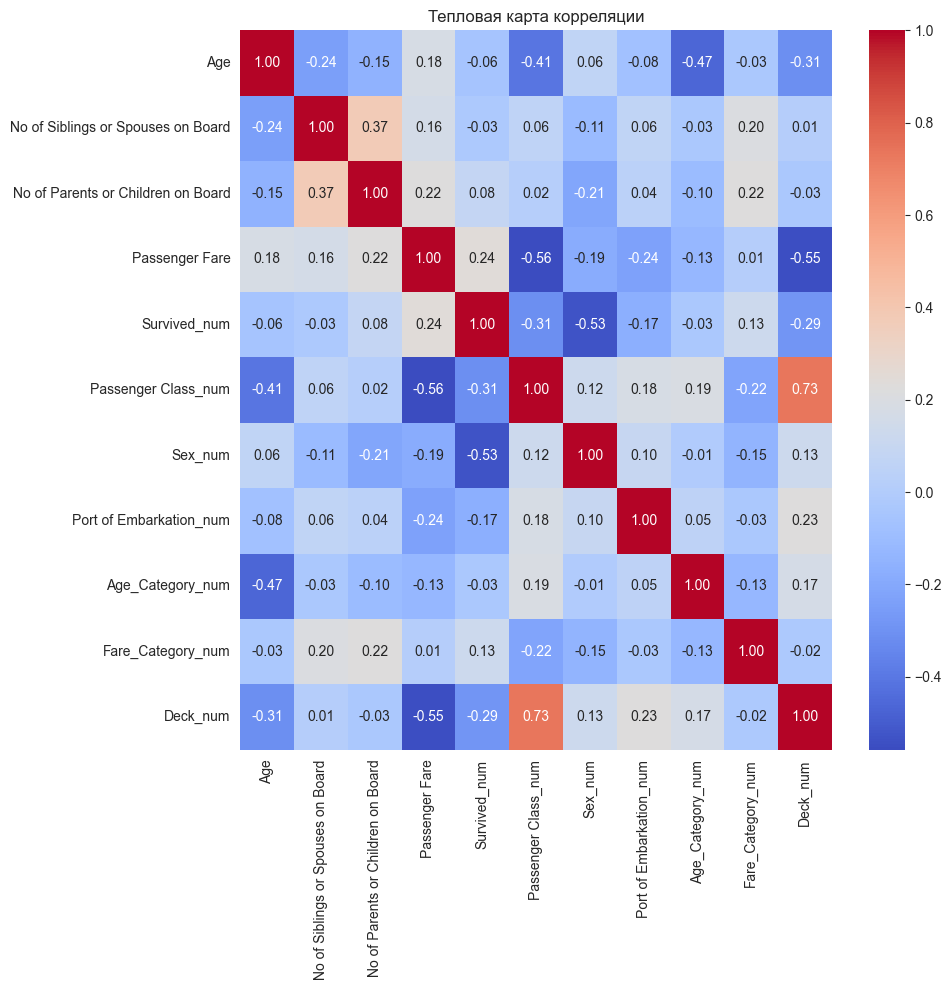

In [33]:
plt.figure(figsize=(10, 10))
# Исключаем ID_passenger из числовых данных
corr_matrix = df_numerical.drop(columns=['ID_passenger']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляции")
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
print(df.dtypes)

ID_passenger                            int64
Survived                               object
Passenger Class                        object
Name                                   object
Sex                                    object
Age                                   float64
No of Siblings or Spouses on Board      int64
No of Parents or Children on Board      int64
Ticket Number                          object
Passenger Fare                        float64
Cabin                                  object
Port of Embarkation                    object
Life Boat                              object
Age_Category                           object
Survived_num                            int64
Fare_Category                          object
Passenger Class_num                     int64
Sex_num                                 int64
Port of Embarkation_num                 int64
Age_Category_num                        int64
Fare_Category_num                       int64
Deck                              

In [26]:
import json
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Загрузка данных (если нужно)
# df = pd.read_csv('titanic_day1.csv')

# Колонки для кодирования
cat_cols = ['Passenger Class', 'Sex', 'Port of Embarkation', 'Age_Category', 'Fare_Category', 'Deck']

# Словарь для хранения соответствий
encoding_mappings = {}

# Создаем и применяем кодировщики
for col in cat_cols:
    le = LabelEncoder()
    df[col+'_num'] = le.fit_transform(df[col])  # Добавляем новый столбец
    
    # Сохраняем соответствия
    encoding_mappings[col] = {
        'classes': le.classes_.tolist(),
        'codes': le.transform(le.classes_).tolist()
    }

# Сохраняем кодировки в JSON
with open('encoding_mappings.json', 'w', encoding='utf-8') as f:
    json.dump(encoding_mappings, f, indent=4, ensure_ascii=False)

# Проверяем результат
print("Новые столбцы в датафрейме:")
print(df.filter(regex='_num$').head())

print("\nСохраненные кодировки:")
for col, mapping in encoding_mappings.items():
    print(f"\n{col}:")
    print(pd.DataFrame({'Original': mapping['classes'], 'Encoded': mapping['codes']}))

Новые столбцы в датафрейме:
   Survived_num  Passenger Class_num  Sex_num  Port of Embarkation_num  \
0             1                    0        0                        2   
1             1                    0        1                        2   
2             0                    0        0                        2   
3             0                    0        1                        2   
4             0                    0        0                        2   

   Age_Category_num  Fare_Category_num  Deck_num  
0                 8                  2         1  
1                 2                  2         2  
2                 7                  2         2  
3                 8                  2         2  
4                 8                  2         2  

Сохраненные кодировки:

Passenger Class:
  Original  Encoded
0    First        0
1   Second        1
2    Third        2

Sex:
  Original  Encoded
0   Female        0
1     Male        1

Port of Embarkation:
      Origi

In [24]:
# Извлекаем первую букву первой каюты
df['Deck'] = df['Cabin'].str[0]  # Просто берем первый символ

In [28]:
# Выбираем только столбцы с типом object (категориальные)
df_categorical = df.select_dtypes(include=['object'])

# Выбираем все остальные (числовые) столбцы
df_numerical = df.select_dtypes(exclude=['object'])

# Проверяем результаты
print("Категориальные признаки:")
print(df_categorical.columns.tolist())

print("\nЧисловые признаки:")
print(df_numerical.columns.tolist())

Категориальные признаки:
['Survived', 'Passenger Class', 'Name', 'Sex', 'Ticket Number', 'Cabin', 'Port of Embarkation', 'Life Boat', 'Age_Category', 'Fare_Category', 'Deck']

Числовые признаки:
['ID_passenger', 'Age', 'No of Siblings or Spouses on Board', 'No of Parents or Children on Board', 'Passenger Fare', 'Survived_num', 'Passenger Class_num', 'Sex_num', 'Port of Embarkation_num', 'Age_Category_num', 'Fare_Category_num', 'Deck_num']


In [36]:
df_categorical.to_csv('titanic_categorical.csv', index=True)
df_numerical.to_csv('titanic_numerical.csv', index=False)